In [1]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-3399 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442878226.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.106201s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors                

In [2]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.107917s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors                

In [3]:
vm.testing_rmse(models, training_df)

{'downhill': 0.70082016570911199,
 'total': 0.477451079461295,
 'uphill': 0.26041068775045245}

In [4]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,-0.499199,-0.733777,0.402018
seg_distance,0.065919,0.170255,0.530836
seg_maximum_grade,-0.213808,-0.166586,-0.282204
total_rating,1.000000,0.997447,0.991088
uphill_rating,0.997447,1.000000,NaN
downhill_rating,0.991088,NaN,1.000000


In [5]:
lb = r.Leaderboards(training_df[['athlete_id', 'segment_id', 'seg_average_grade', 'average_speed']])
lb.get('segment', segment_ratings)

{'downhill_rating':       segment_id  downhill_rating
 rank                             
 1        3305098       100.000000
 2        6135256        96.421942
 3        8429549        89.194097
 4        1745022        84.940604
 5        4173351        80.816413
 6        4259807        75.494526
 7        5857327        72.409896
 8        2435434        51.502080
 9        8692386        49.366423
 10       6325954        48.138228
 11       1759580        46.643174
 12        821934        45.441417
 13       4599878        45.291980
 14       5099924        42.961948
 15        881888        41.516408
 16        633435        39.024807
 17       5079282        38.910438
 18       7969432        38.364444
 19       2665113        37.906017
 20       1105154        37.688685,
 'total_rating':       segment_id  total_rating
 rank                          
 1        3305098    100.000000
 2        6135256     97.772368
 3        8429549     90.198844
 4        1745022     83.635368
 5

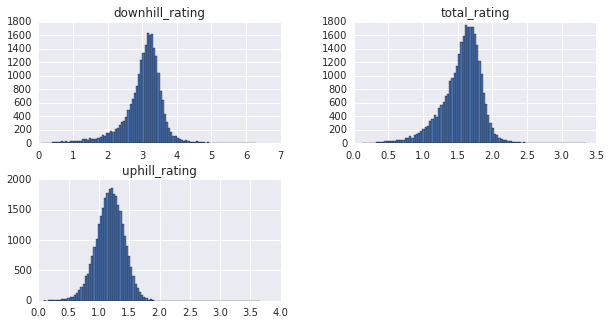

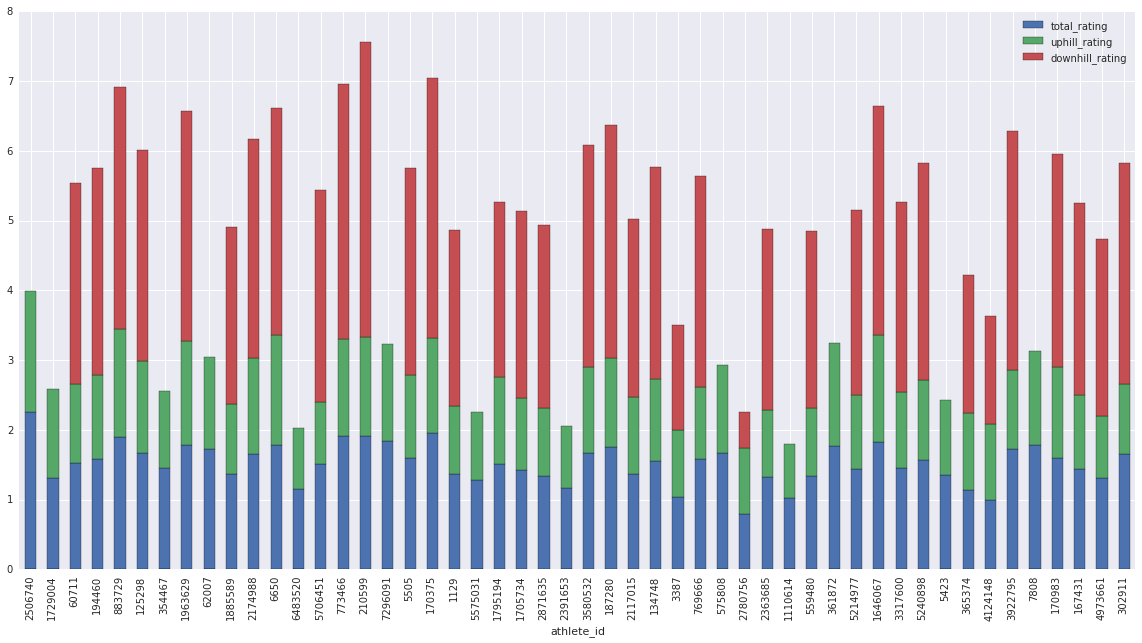

In [ ]:
vm.plot_ratings(athlete_ratings)

In [ ]:
vm.plot_ratings(segment_ratings)

In [ ]:
df.query('segment_id == 7074191 & average_speed < 2.2')

In [ ]:
segment_ratings.min()

In [ ]:
athlete_ratings.ix[6637281]

In [ ]:
(segment_ratings.uphill_rating > -.28).mean()

In [ ]:
print(segment_ratings.ix[975395])
print(segment_ratings.ix[651728])
print((segment_ratings.uphill_rating>4.88).mean())
print((segment_ratings.total_rating>-0.42).mean())

In [ ]:
for rating in ['uphill_rating', 'total_rating', 'downhill_rating']:
    pd.merge(athlete_ratings[rating].reset_index(), training_df.groupby('athlete_id').average_speed.mean().reset_index(), on='athlete_id').plot(kind='scatter', x=rating, y='average_speed')
    
